In [1]:
#libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LOGISTIC REGRESSION

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [3]:
#load the dataset
df=pd.read_csv('loan prediction dataset.csv')

In [ ]:
DATASET

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
DATA CLEANING -Handles Missing values,Duplicates

In [5]:
#data preprocessing 
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.notnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
df.fillna(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,1.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
FEATURE EXTRACTION -Converts Categorical data to the numeric value 

In [9]:
#feature extraaction 
#convert the categorical data as the numerical value
#loan status No-0,Yes-1
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [11]:
le=LabelEncoder()

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
cols=(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Property_Area', 'Loan_Status'])
for col in cols:
    df[col]=le.fit_transform(df[col])

In [30]:
df.dropna(inplace=True)  # remove rows with any missing values

x = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Now split correctly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)#RANDOM state-returns the same value 


In [31]:
x=x.shape
y=y.shape

In [32]:
x,y

((614, 11), (614,))

In [ ]:
LOGISTIC REGRESSION-The algorithm handles categorical data such as 0 or1 

In [34]:

#LOAN APPROVAL 
#0-NOT APPROVED
#1-APPROVED
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
y_pred=model.predict(x_test)#model evaluation

In [44]:
accuracy=accuracy_score(y_test,y_pred)
print(f"",accuracy)

 0.7886178861788617


In [43]:
classificationreport=classification_report(y_test,y_pred)
print(f"",classificationreport)

               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

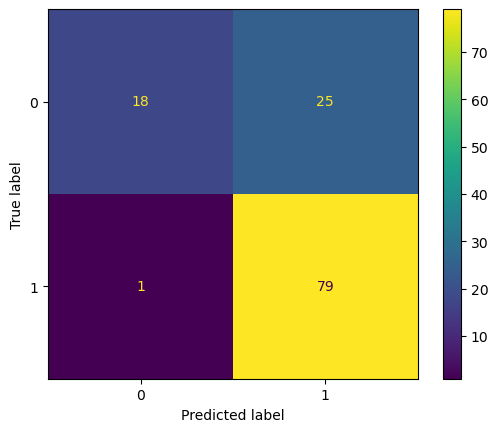

In [49]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [ ]:
RANDOMFORESTCLASSIFIER-ENSEMBLE LEARNING ALGORITHM.HAVE OUTPUT FROM THE MULTIPLE DECISION TREE.IMPROVES THE MODEL PERFORMANCE AND ACCURACY 

In [51]:
#model 
#predicts 18 loan rejection
#25-incorrect approved loan
#1-missed one approval
#79-correct prediction

In [52]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [56]:
model=RandomForestClassifier(n_estimators=100,random_state=45)#n_estiator-no of decision trees
model.fit(x_train,y_train)

RandomForestClassifier(random_state=45)

In [57]:
y_pred1=model.predict(x_test)

In [59]:
print(y_pred1)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1]


In [61]:
accuracy_score(y_test,y_pred)

0.7886178861788617

In [62]:
report=classification_report(y_test,y_pred)
print(f"",report)

               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

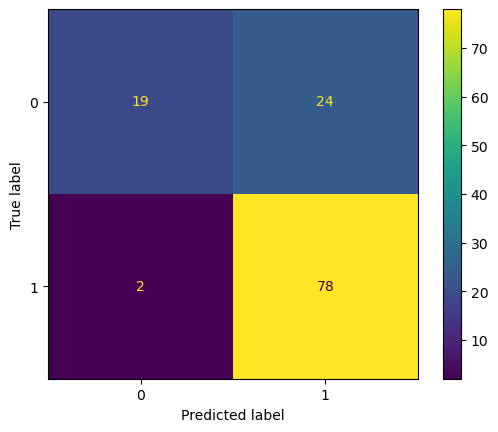

In [68]:
cm=confusion_matrix(y_test,y_pred1)
cm
cmplot=ConfusionMatrixDisplay(confusion_matrix=cm)
cmplot.plot()

In [69]:
#tn-19
#fn-2
#fp-24
#tp-78

In [ ]:
SUPPORT VECTOR CLASSIFIER -SUPERVISED LEARNING ALGORITHM.Handles high dimensional space(many features)

In [70]:
from sklearn.svm import SVC
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
y_pred2=model2.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred2)

0.7886178861788617

In [74]:
cr=classification_report(y_test,y_pred)
print(f"",cr)

               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [79]:
cm3=confusion_matrix(y_test,y_pred2)
print(f"",cm)

 [[18 25]
 [ 1 79]]


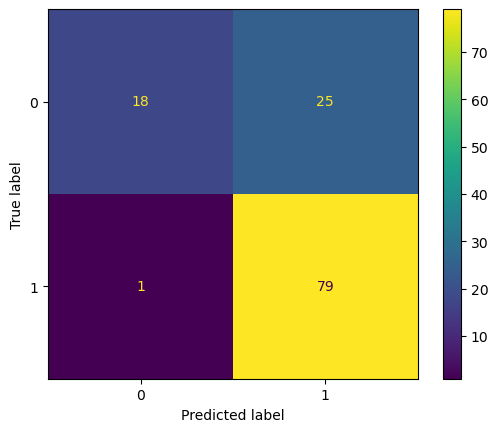

In [80]:
plot=ConfusionMatrixDisplay(confusion_matrix=cm3)
plot.plot()
